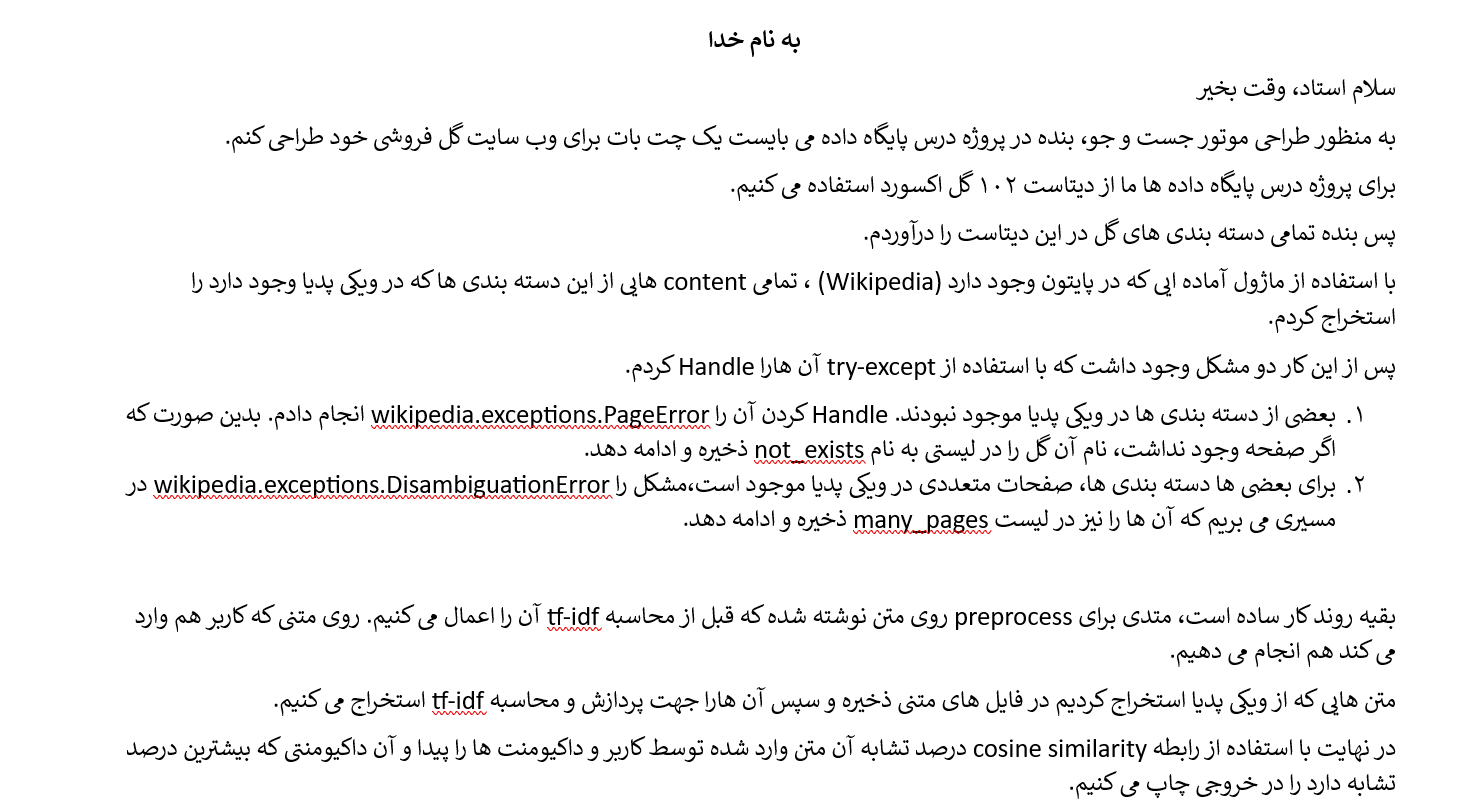



In [1]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# SnowballStemmer for English
stemmer = SnowballStemmer("english")

def preprocess(text):
    # to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    
    # Stem words
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)
    
    return text

The Oxford 102 Flower Dataset consists of images of 102 different types of flowers.    
The categories (flower types) are listed below:

In [2]:
# Get a list of Wikipedia pages to search
pages_flower = ['pink primrose',
'hard-leaved pocket orchid',
'canterbury bells',
'sweet pea',
'tiger lily',
'monkshood',
'english marigold',
'moon orchid',
'bird of paradise',
'globe thistle',
'snapdragon',
"colt's foot",
'king protea',
'spear thistle',
'yellow iris',
'globe-flower',
'purple coneflower',
'peruvian lily',
'balloon flower',
'giant white arum lily',
'fire lily',
'pincushion flower',
'fritillary',
'red ginger',
'grape hyacinth',
'corn poppy',
'prince of wales feathers',
'stemless gentian',
'artichoke',
'sweet william',
'carnation',
'garden phlox',
'love in the mist',
'mexican aster',
'alpine sea holly',
'ruby-lipped cattleya',
'cape flower',
'great masterwort',
'siam tulip',
'lenten rose',
'barbeton daisy',
'daffodil',
'sword lily',
'poinsettia',
'bolero deep blue',
'wallflower',
'marigold',
'buttercup',
'oxeye daisy',
'common dandelion',
'petunia',
'wild pansy',
'primula',
'sunflower',
'pelargonium',
'bishop of llandaff',
'gaura',
'geranium',
'orange dahlia',
'pink-yellow dahlia',
'cautleya spicata',
'japanese anemone',
'black-eyed susan',
'silverbush',
'californian poppy',
'osteospermum',
'spring crocus',
'bearded iris',
'windflower',
'tree poppy',
'gazania',
'azalea',
'water lily',
'rose',
'thorn apple',
'morning glory',
'passion flower',
'lotus',
'toad lily',
'anthurium',
'frangipani',
'clematis',
'hibiscus',
'columbine',
'desert-rose',
'tree mallow',
'magnolia',
'cyclamen',
'watercress',
'canna lily',
'hippeastrum',
'bee balm',
'ball moss',
'foxglove',
'bougainvillea',
'camellia',
'mallow',
'mexican petunia',
'bromelia',
'blanket flower',
'trumpet creeper',
'blackberry lily']

In [3]:
import wikipedia


# Set up the Wikipedia API
wikipedia.set_lang("en")

def save_content_txt(pages_flower):
    not_exists = []
    many_pages = []
    for page in pages_flower:
        try:
            text = wikipedia.page(page).content

            # Create a new file with the page title as the filename
            filename = page.replace(" ", "_") + ".txt"
            filepath = os.path.join("flower", filename)

            with open(filepath, "w", encoding="utf-8") as f:
                # Write the content of the page to the file
                f.write(text)

        except wikipedia.exceptions.DisambiguationError as e:
            many_pages.append(page)
            pass

        except wikipedia.exceptions.PageError as e2:
            not_exists.append(page)
            pass
    return not_exists, many_pages

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os

def read_content_txt(path, input_):
    folder_path = path
    filenames = []
    documents = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        with open(filepath, "r", encoding="utf-8") as f:
            text = f.read()
            text = preprocess(text)
            documents.append(text)
            filenames.append(filename)

    # tf-idf for all docs
    vectorizer = TfidfVectorizer()
    tfidf_vectors = vectorizer.fit_transform(documents)
    input_vector = vectorizer.transform([input_])

    # Calculate the cosine similarity between the input vector and the document vectors
    similarities = cosine_similarity(input_vector, tfidf_vectors)

    # Get the index of the most similar document
    most_similar_index = similarities.argmax()
    most_similar_filename = filenames[most_similar_index]

    return most_similar_filename
    

In [23]:
input_ = input()
print(input_)

input_ = preprocess(input_)

i am searching for azalea information


In [21]:
not_exists, many_pages = save_content_txt(pages_flower)

In [22]:
most_similar_filename = read_content_txt("flower", input_)

print(not_exists)
print(many_pages)
print(f"The most similar document to '{input_}' is '{most_similar_filename}'.")

search azalea flower inform

['sweet pea', 'tiger lily', 'monkshood', 'grape hyacinth', 'carnation', 'ruby-lipped cattleya', 'lenten rose', 'marigold', 'wild pansy', 'bearded iris', 'water lily', 'passion flower', 'watercress', 'bee balm']
["colt's foot", 'fire lily', 'pincushion flower', 'love in the mist', 'windflower', 'gazania', 'lotus', 'bougainvillea', 'camellia', 'mallow']
The most similar document to 'search azalea flower inform' is 'azalea.txt'.


In [24]:
filepath = os.path.join('flower', most_similar_filename)
with open(filepath, "r", encoding="utf-8") as f:
    text = f.read()
text

'Azaleas  are flowering  shrubs in the genus Rhododendron, particularly the former  sections Tsutsusi (evergreen) and Pentanthera (deciduous). Azaleas bloom in the spring (April and May in the temperate Northern Hemisphere, and October and November in the Southern Hemisphere), their flowers often lasting several weeks. Shade tolerant, they prefer living near or under trees. They are part of the family Ericaceae.\n\n\n== Cultivation ==\n\nPlant enthusiasts have selectively bred azaleas for hundreds of years. This human selection has produced over 10,000 different cultivars which are propagated by cuttings. Azalea seeds can also be collected and germinated.\nAzaleas are generally slow-growing and do best in well-drained acidic soil (4.5–6.0 pH). Fertilizer needs are low. Some species need regular pruning.\nAzaleas are native to several continents including Asia, Europe and North America. They are planted abundantly as ornamentals in the southeastern US, southern Asia, and parts of southw